
# Introduction

The Telco customer churn data set consists of information on customers of a telecommunications company. The data includes customer demographic information (such as age, gender, and location), services used, and whether or not the customer churned. The goal of this EDA is to understand the factors that contribute to customer churn, in order to make recommendations on how to reduce it.

In [1]:
# Loading the Required Packages:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
# Reading the Dataset
data = pd.read_csv("churn.csv")

In [3]:
pd.options.display.max_columns = None

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.shape

(7043, 21)

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From this we can see that the data contains 21,084 rows and 21 columns. Most of the columns are of the object data type, which means they are either strings or categorical variables. There are also a few numerical columns, such as tenure, MonthlyCharges, and TotalCharges.

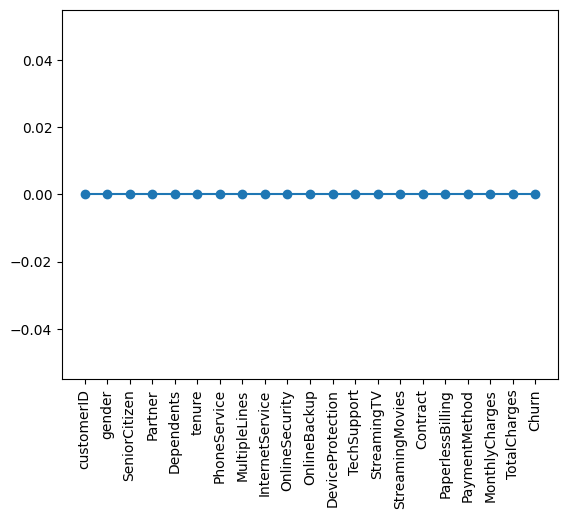

In [10]:
# Cheacking the Null Values
plt.plot(data.isnull().sum(),marker='o')
plt.xticks(rotation=90)
plt.show()

In [11]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
# The Total charges need to be numerical type not6 Object type.
# To do this will use the PD.to Numeric 
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')

In [13]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
# After the Conversion cheacking for the null values

data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

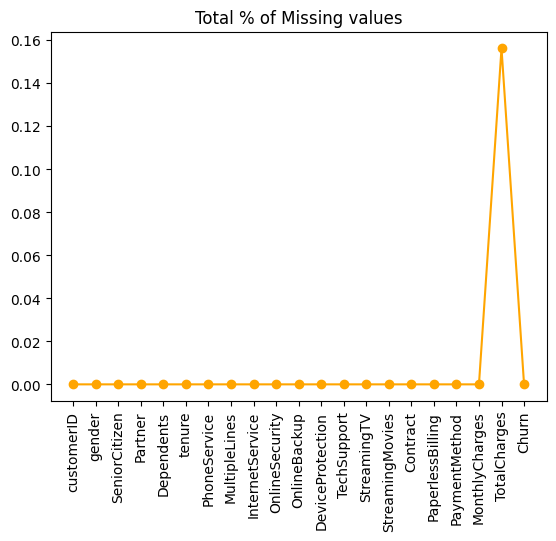

In [15]:
# Cheacking the Null Values
plt.plot((data.isnull().sum()*100)/data.shape[0],marker='o',color='orange')
plt.xticks(rotation=90)
plt.title("Total % of Missing values")
plt.show()

Here we can see that our data contains **less then 15 % *  of the missing values and according to the rule of thumb if data is > 50% the we can drop the data

In [16]:
data = data.drop("customerID",axis=1)
# Converting the Categorical data into numerical data.
# To do this we can use varity of methods but in this case we will use the label encoder method

<AxesSubplot: >

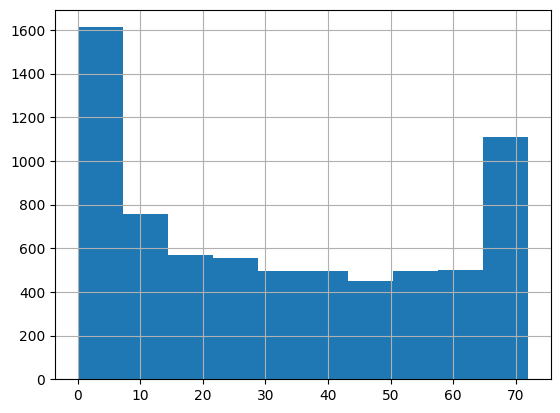

In [7]:
data['tenure'].hist()

<AxesSubplot: >

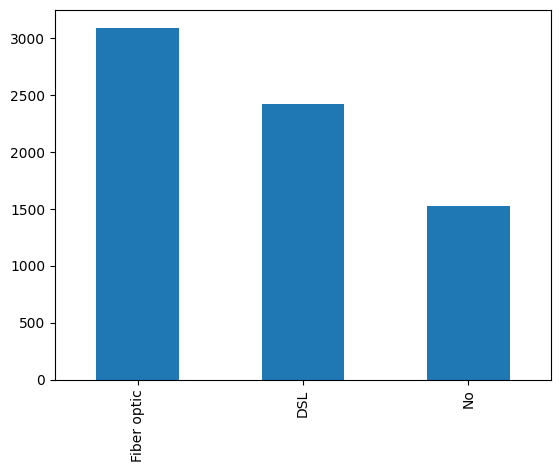

In [8]:
data['InternetService'].value_counts().plot(kind='bar')

C:\Users\diwak\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='tenure', ylabel='MonthlyCharges'>

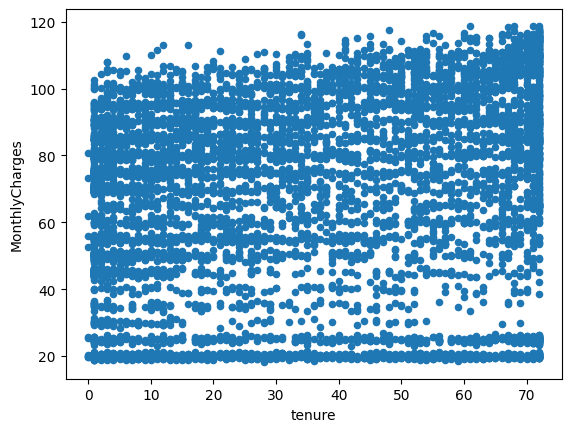

In [9]:

data.plot(x='tenure', y='MonthlyCharges', kind='scatter')

<AxesSubplot: xlabel='InternetService'>

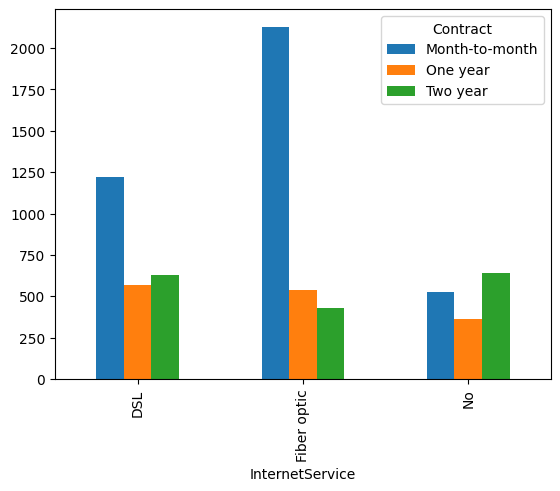

In [11]:
pd.crosstab(data['InternetService'], data['Contract']).plot(kind='bar')

In [17]:
object_temp = data.select_dtypes(include=['object']).copy()
numerical_temp = data.select_dtypes(exclude=['object']).copy()

In [18]:
# Cheacking the total % of customer who churned
categorical_temp = pd.DataFrame()

In [19]:
# Converting the Categorical variables to the Numerical Variables
for i in object_temp:
    object_temp[i]=object_temp[i].astype('category')
    categorical_temp[i] = object_temp[i].cat.codes

In [20]:
df = pd.concat([categorical_temp,numerical_temp],axis=1)

In [21]:
df.dtypes

gender                 int8
Partner                int8
Dependents             int8
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
Churn                  int8
SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

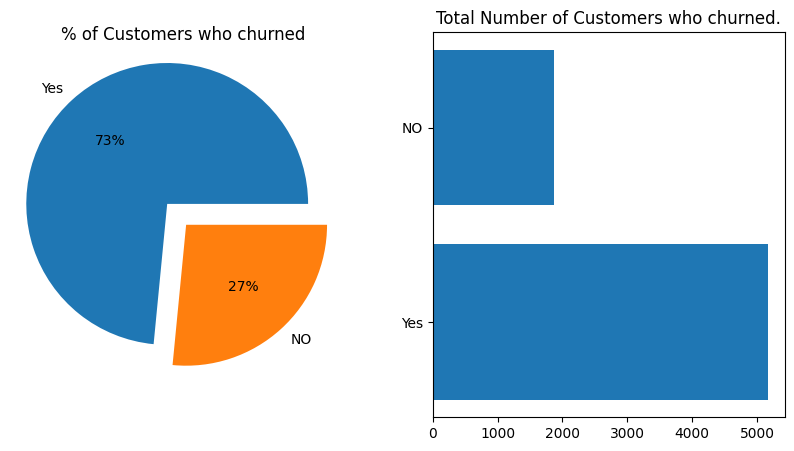

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df.Churn.value_counts(),labels=["Yes","NO"],explode=[0.2,0], autopct='%.0f%%')
plt.title("% of Customers who churned ")
plt.subplot(1,2,2)
plt.barh(["Yes","NO"],data.Churn.value_counts())
plt.title("Total Number of Customers who churned.")
plt.show()

After lookig the Data we can clearly see that our data is highly inblanced.

In [23]:
# Finding the Highly Corellated features

In [24]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


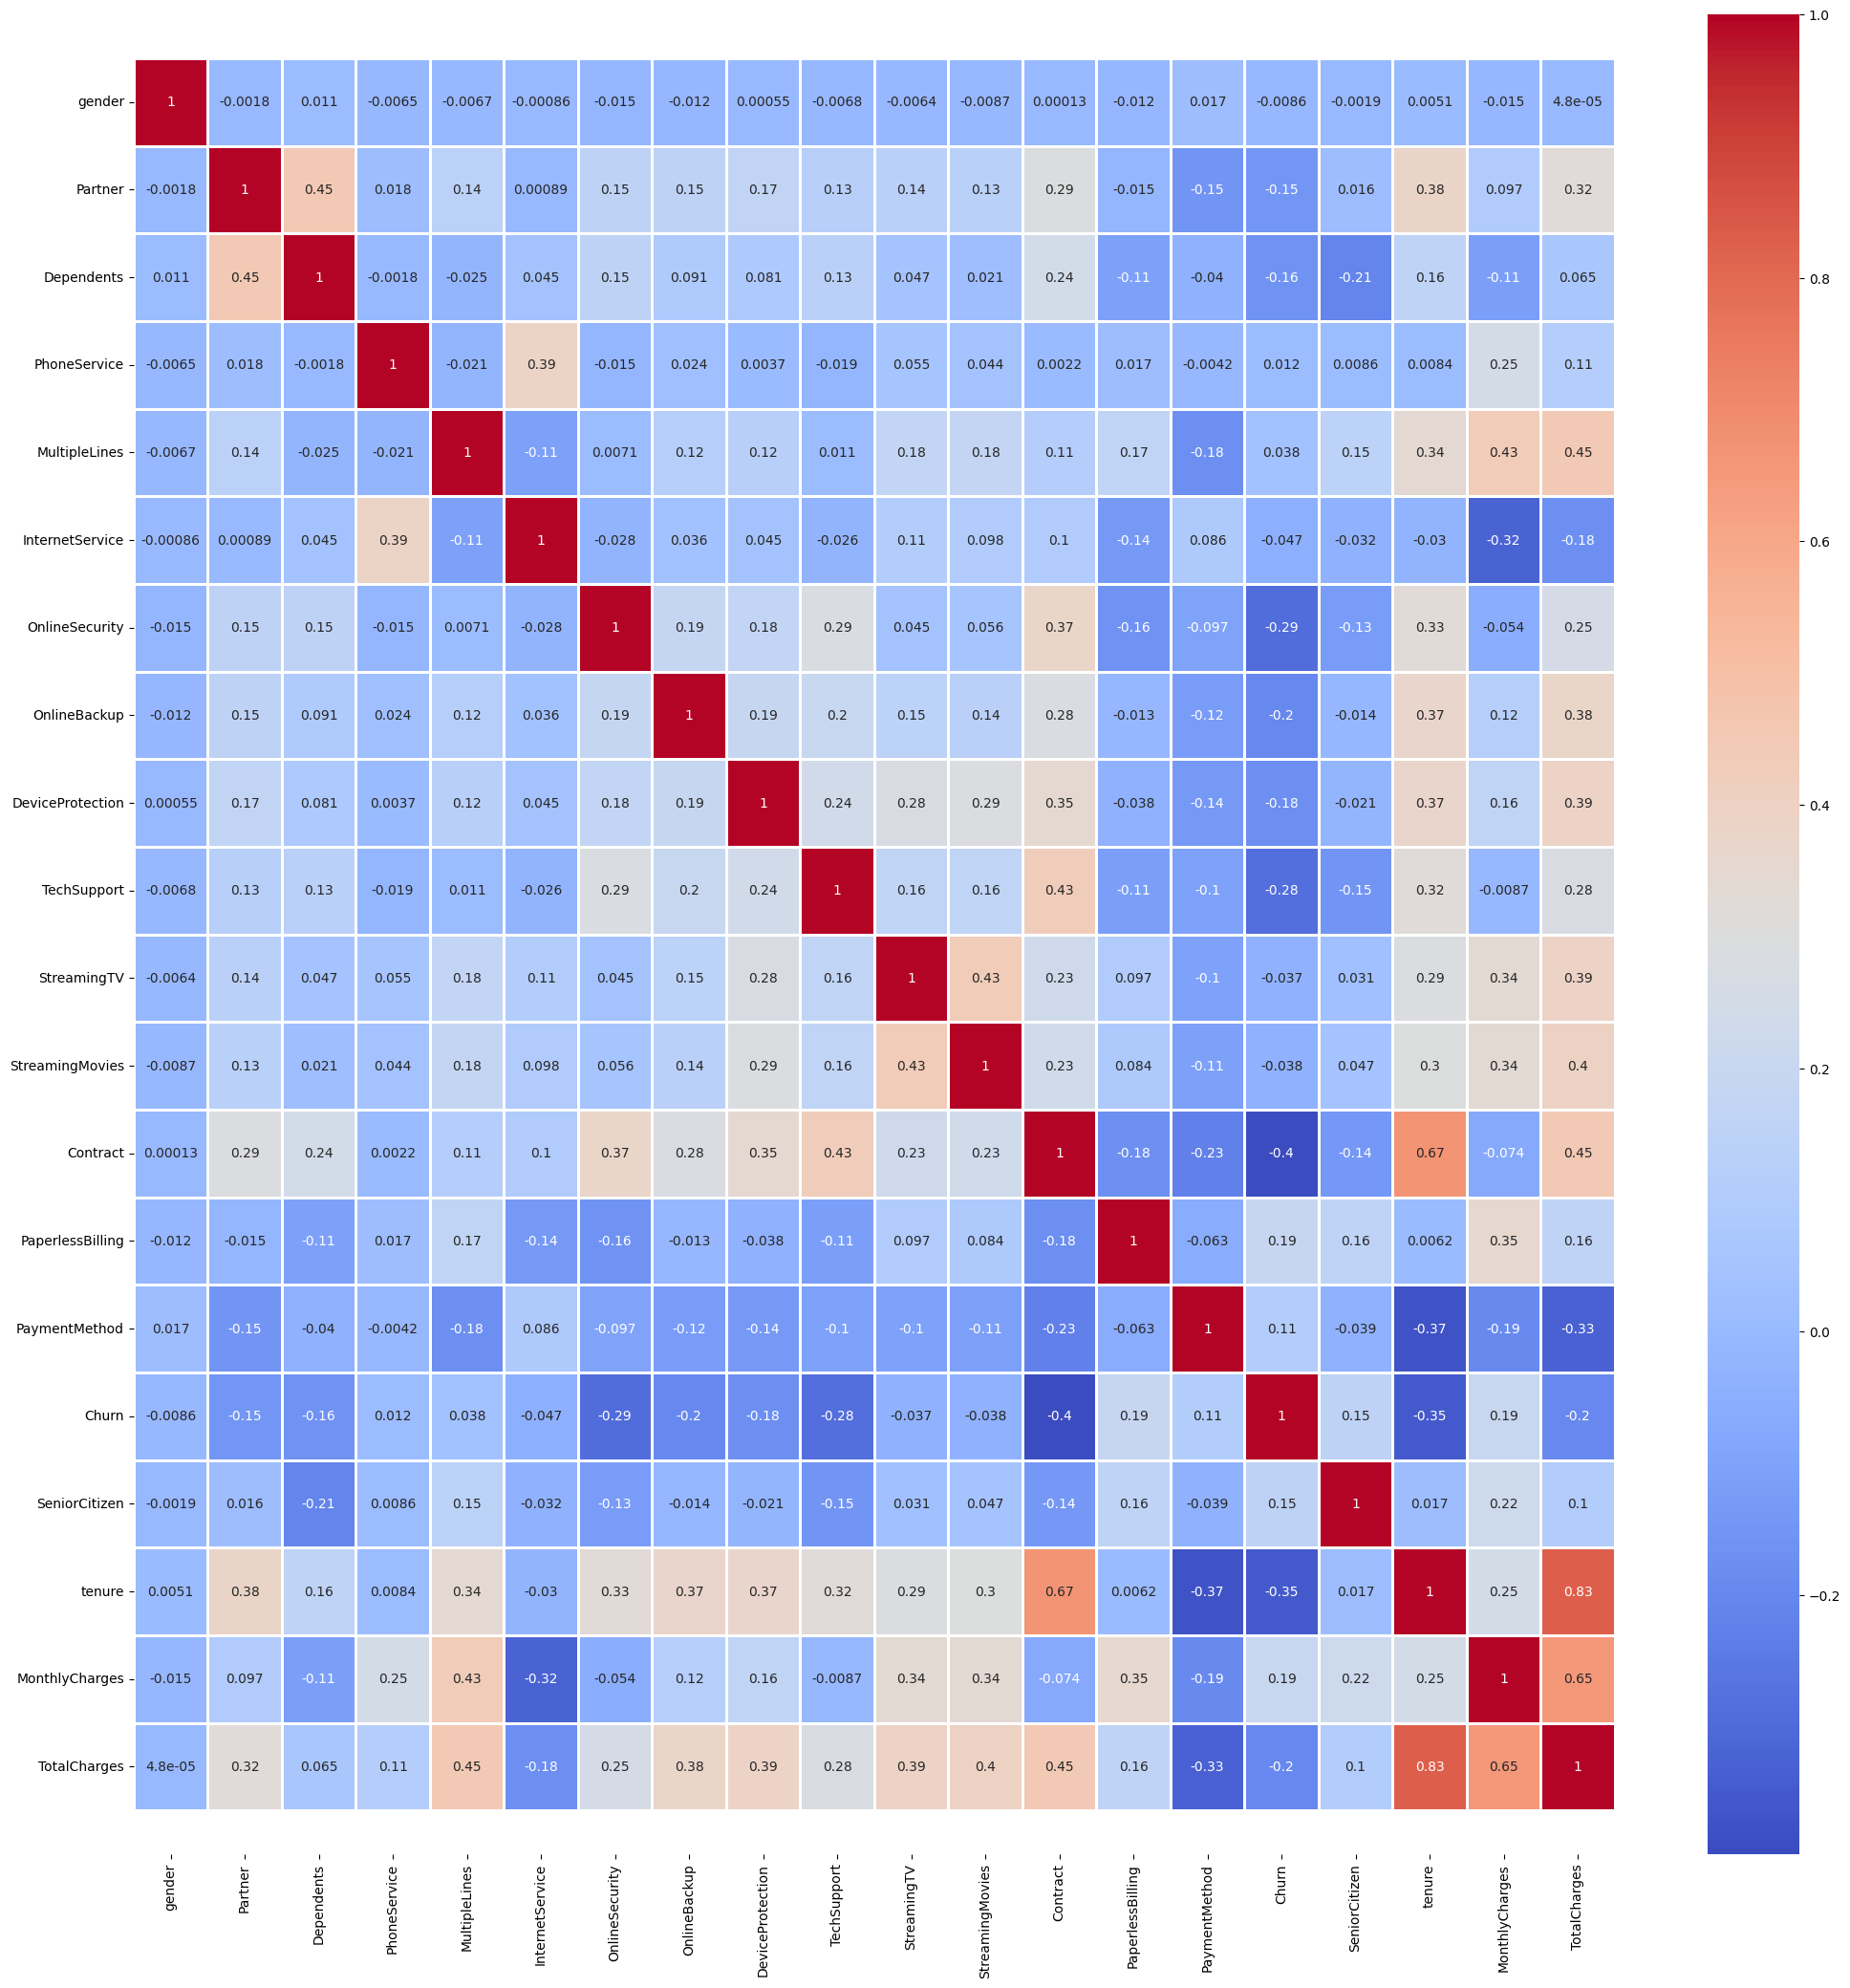

In [25]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidth=2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

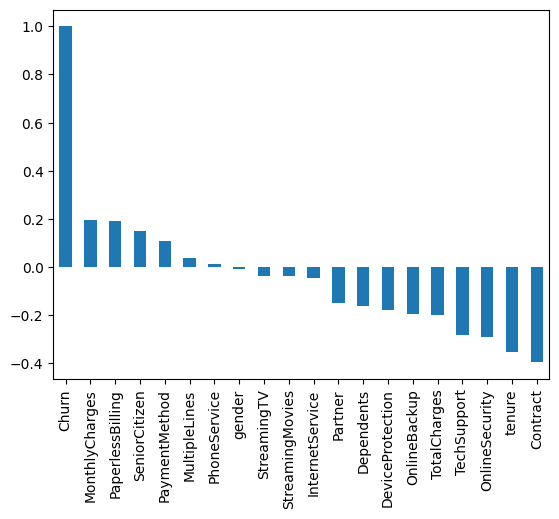

In [26]:

df.corr().Churn.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [27]:
# bivarite analysis

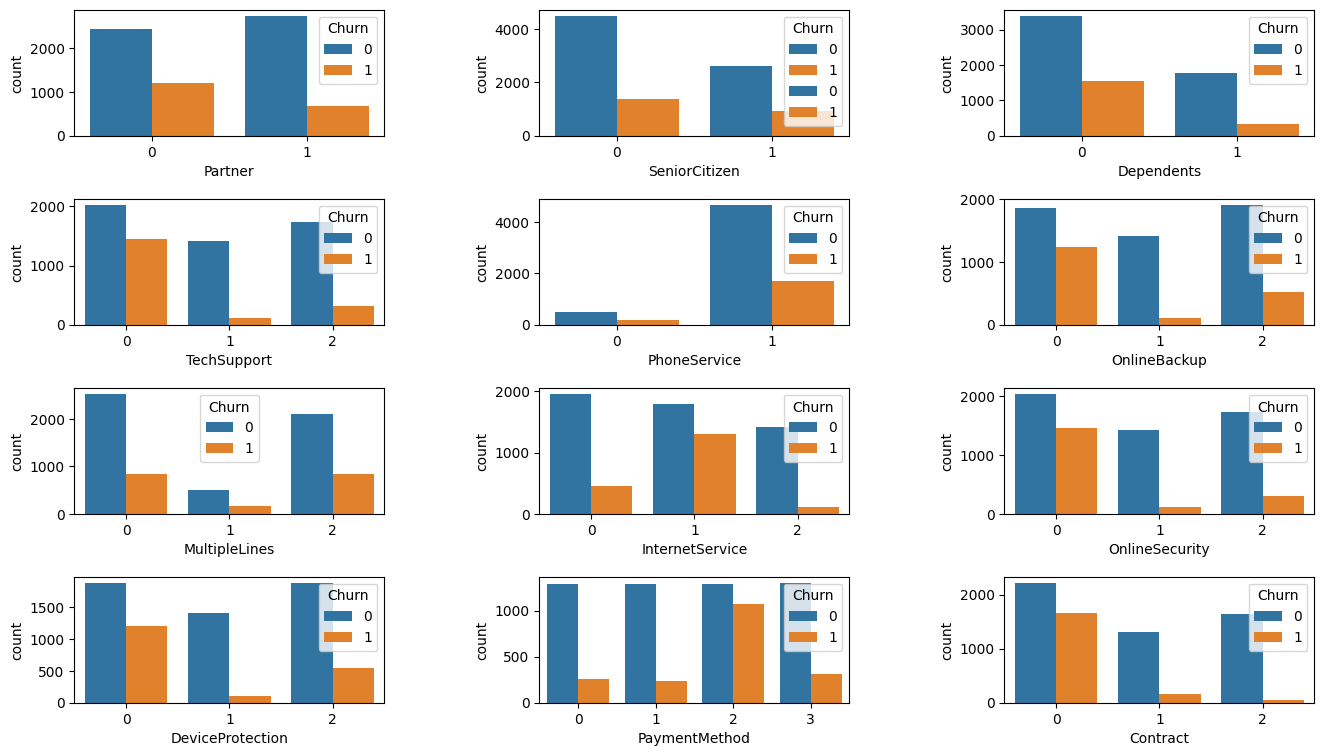

In [34]:
plt.figure(figsize=(16,9))
plt.subplot(4,3,1)
sns.countplot(data=df, x=df.Partner, hue='Churn')
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,2)
sns.countplot(data=df, x=df.gender, hue='Churn')
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,2)
sns.countplot(data=df, x=df.SeniorCitizen, hue='Churn')
plt.subplot(4,3,3)
sns.countplot(data=df, x=df.Dependents, hue='Churn')
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,4)
sns.countplot(data=df, x=df.TechSupport, hue='Churn')

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,5)
sns.countplot(data=df, x=df.PhoneService, hue='Churn')

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,6)
sns.countplot(data=df, x=df.OnlineBackup, hue='Churn')
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,7)
sns.countplot(data=df, x=df.MultipleLines, hue='Churn')

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,8)
sns.countplot(data=df, x=df.InternetService, hue='Churn')

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,9)
sns.countplot(data=df, x=df.OnlineSecurity, hue='Churn')

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,10)
sns.countplot(data=df, x=df.DeviceProtection, hue='Churn')

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,11)
sns.countplot(data=df, x=df.PaymentMethod, hue='Churn')

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(4,3,12)
sns.countplot(data=df, x=df.Contract, hue='Churn')

plt.show()
    

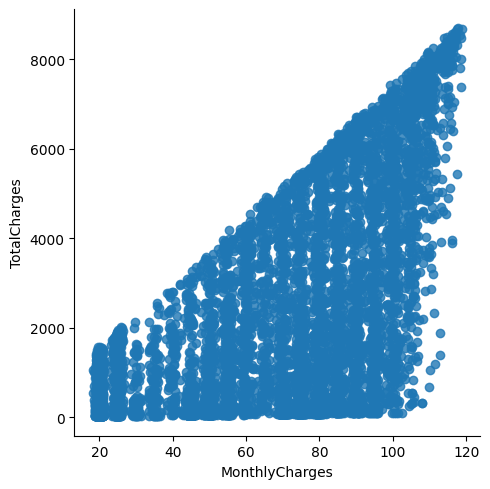

In [29]:
# Device protection vs TotalCharges
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Here we can see a clear relationshgip b/w Monthly charges and the total charges and if the monthly charges increase the total charges will also increase

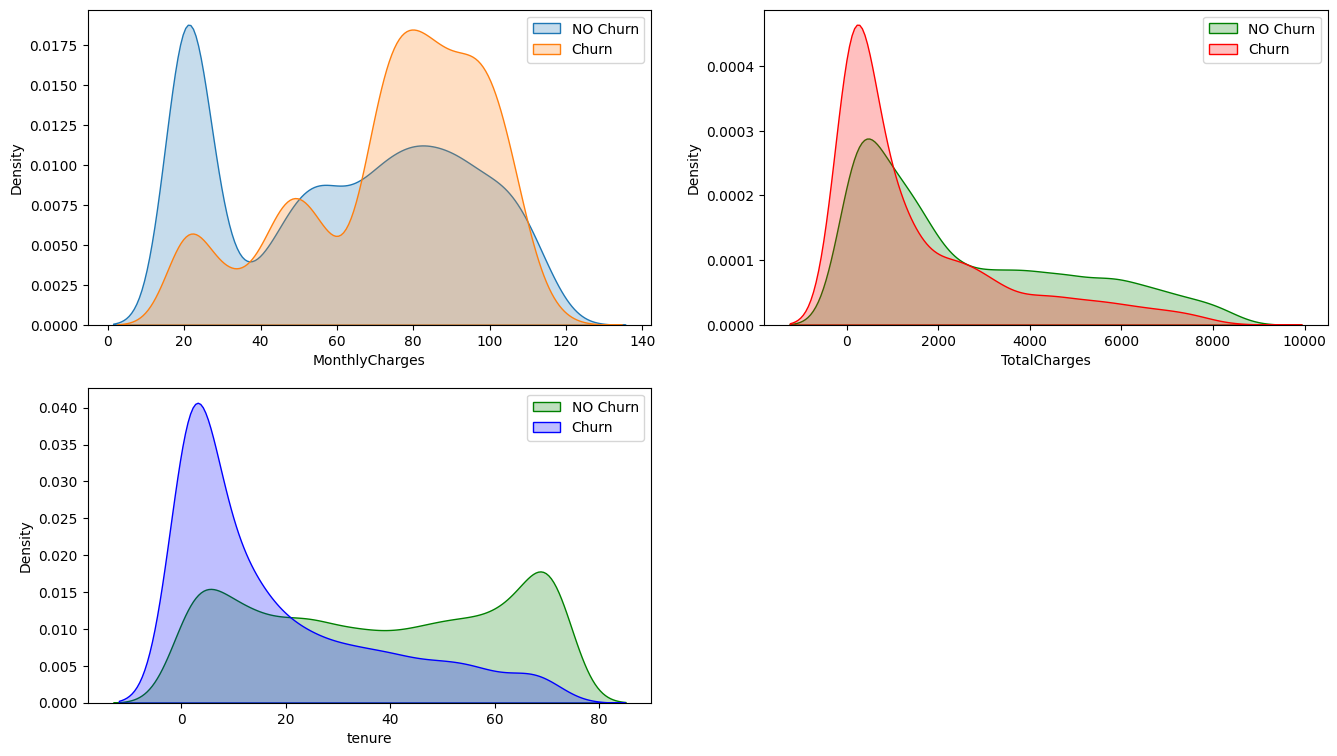

In [30]:
# KDE PLOT

churn_filter_no = df.Churn==0
churn_filter_yes = df.Churn==1
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.kdeplot(df.MonthlyCharges[churn_filter_no],fill=True,label='NO Churn')
sns.kdeplot(df.MonthlyCharges[churn_filter_yes],fill=True,label='Churn')
plt.legend()
plt.subplot(2,2,2)
sns.kdeplot(df.TotalCharges[churn_filter_no],fill=True,label='NO Churn',color='green')
sns.kdeplot(df.TotalCharges[churn_filter_yes],fill=True,label='Churn',color='red')
plt.legend()
plt.subplot(2,2,3)
sns.kdeplot(df.tenure[churn_filter_no],fill=True,label='NO Churn',color='green')
sns.kdeplot(df.tenure[churn_filter_yes],fill=True,label='Churn',color='blue')
plt.legend()

plt.legend()
plt.show()

Here We can see that chance of customer will churn if the monthly charges increases.